In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image , ImageOps
from matplotlib import image as im
from math import sin , cos, pi
import math
import os
import cv2
%matplotlib inline 

uint8
(1552, 1247, 4)


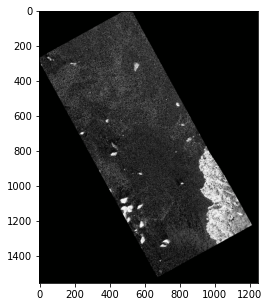

In [2]:
img = im.imread('img3.bmp')
print(img.dtype)
print(img.shape)
fig = plt.figure(figsize = (5,5))
fig = plt.imshow(img)
plt.show()
image2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [3]:
# cv2.imshow('image',image2)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [4]:
cv2.namedWindow("output", cv2.WINDOW_NORMAL)        # Create window with freedom of dimensions            # Resize window to specified dimensions                        # Read image
cv2.imshow("output", image2)                            # Show image
cv2.waitKey(0)

-1

In [5]:
data = np.asarray(image2)
data.shape
data[500][:200]

array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,  44, 185, 131,   1, 119,   1,  87, 169, 165,   1, 174,
       181,   1,   1, 150, 164, 107, 110,   1,   1,   1, 106,  80, 120,
       154,   1,   1, 170,   1, 152,   1,  50,   1, 116,   1,   1,   1,
         1, 136,  81,   1,   1,   1,   1,   1,   1,   1,   1, 162,   1,
       163,   1,   1, 159, 147,   1, 101, 157,   1,   1, 116,   

In [6]:
# temp=0
# count=1
# for i in data:
#     for j in i:
#         if j>1:
#             temp+=j
#             count+=1
# avg = temp/count 
# avg

In [7]:
#crazy fast version of above cuz numpy
avgg = np.mean(data[data>1])
avgg

116.18999536345372

In [8]:
#normal binary threshold, needs median filter
ret,th1 = cv2.threshold(image2, 1.5*avgg,255,cv2.THRESH_BINARY)
cv2.namedWindow("output", cv2.WINDOW_NORMAL)        # Create window with freedom of dimensions            # Resize window to specified dimensions                        # Read image
cv2.imshow("output", th1)                            # Show image
cv2.waitKey(0)

-1

In [ ]:
#adaptive mean, needs median   #not suitable
th2 = cv2.adaptiveThreshold(image2, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 999, 1)
cv2.namedWindow("output", cv2.WINDOW_NORMAL)        # Create window with freedom of dimensions            # Resize window to specified dimensions                        # Read image
cv2.imshow("output", th2)                            # Show image
cv2.waitKey(0)

In [72]:
th3 = cv2.adaptiveThreshold(image2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                          cv2.THRESH_BINARY, 9, 1)
cv2.namedWindow("output", cv2.WINDOW_NORMAL)        # Create window with freedom of dimensions            # Resize window to specified dimensions                        # Read image
cv2.imshow("output", th3)                            # Show image
cv2.waitKey(0)

-1

In [100]:
#median filter
md1 = cv2.medianBlur(th1, 11) # Add median filter to image
cv2.namedWindow("output", cv2.WINDOW_NORMAL)        # Create window with freedom of dimensions            # Resize window to specified dimensions                        # Read image
cv2.imshow("output", md1)                            # Show image
cv2.waitKey(0)

-1

In [73]:
im_shows =  np.concatenate((image2, md1), axis=1)
cv2.namedWindow("output", cv2.WINDOW_NORMAL)        # Create window with freedom of dimensions            # Resize window to specified dimensions                        # Read image
cv2.imshow("output", im_shows)                            # Show image
cv2.waitKey(0)

-1